In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# One-hot encoding for the labels
encoder = LabelBinarizer()
y_onehot = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    Dropout(0.2),  # Dropout to reduce overfitting
    Dense(8, activation='relu'),  # Hidden layer
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=16, 
                    validation_data=(X_test, y_test), 
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Display results
print("Predicted classes:", predicted_classes)
print("True classes:", true_classes)

# Save the model
model.save('iris_nn_model.h5')


c:\Users\mykro\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6103 - loss: 0.9738 - val_accuracy: 0.7667 - val_loss: 0.7247
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7163 - loss: 0.6863 - val_accuracy: 0.8667 - val_loss: 0.4795
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8281 - loss: 0.5064 - val_accuracy: 0.9000 - val_loss: 0.3480
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8881 - loss: 0.3660 - val_accuracy: 0.9333 - val_loss: 0.2444
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8918 - loss: 0.3100 - val_accuracy: 0.9667 - val_loss: 0.1772
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8871 - loss: 0.2383 - val_accuracy: 0.9667 - val_loss: 0.1369
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9248 - loss: 0.2278 - val_accuracy: 0.9333 - val_loss: 0.1128
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9279 - loss: 0.2072 - val_accuracy: 1.0000 - val_loss:

Predicted classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
True classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


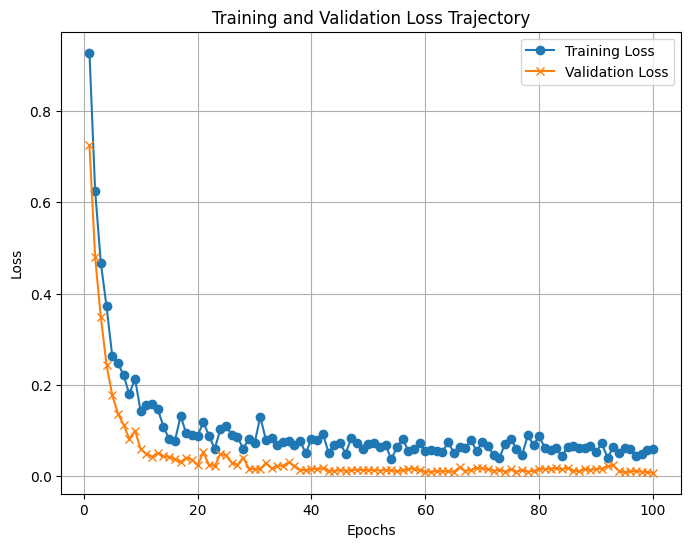

In [3]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot the loss trajectory
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='x')
plt.title('Training and Validation Loss Trajectory')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()